# 6310505688 กิตติภัค วิบูลเสถียร

** ตัวอย่างการทดสอบ learning machine **

**เรียกใช้ library**
* [scipy](https://www.scipy.org/)
* [numpy](https://numpy.org)
* [matplotlib](https://matplotlib.org)
* [pandas](https://pandas.org)
* [scikit-learn](https://scikit-learn.org)



In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
scipy: 1.11.1
numpy: 1.24.3
matplotlib: 3.7.2
pandas: 2.0.3
sklearn: 1.3.0


In [2]:
# Load libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

โหลดข้อมูล iris จาก UCI dataset

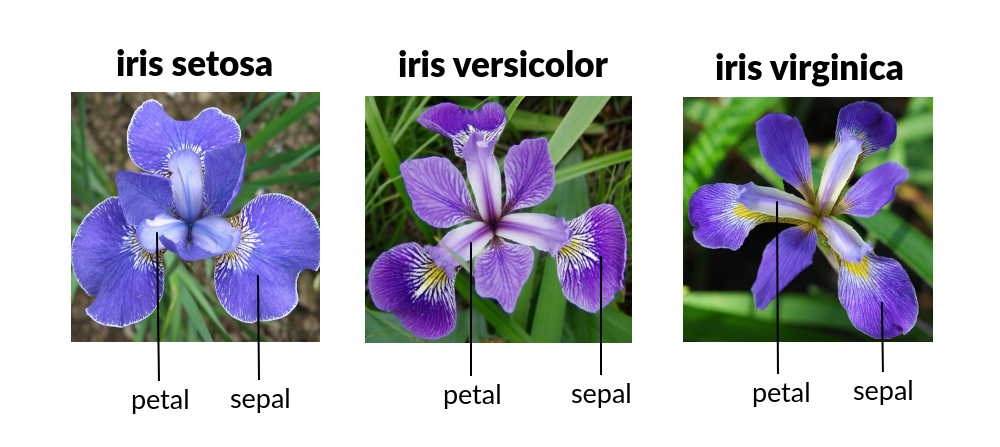

In [3]:
# Load dataset
from pandas import read_csv
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

แสดงขนาดของข้อมูล

In [4]:
print(url)
# shape
print(dataset.shape)

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
(150, 5)


แสดงตัวอย่างข้อมูล 10 บรรทัดแรก

In [5]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


แสดงสถิติพื้นฐานของชุดข้อมูล

In [6]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


แสดงการกระจาย ('class') ของข้อมูล

In [7]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


แสดงการกระจายของ feature ด้วย box&whisker plot

<Axes: >

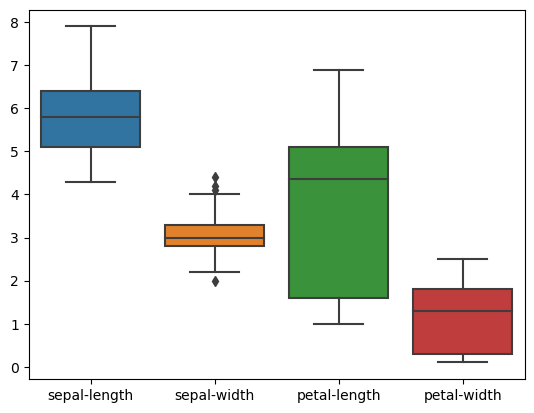

In [8]:
import seaborn as sns
sns.boxplot(data=dataset)

การกระจายในรูป histogram ของแต่ละ feature

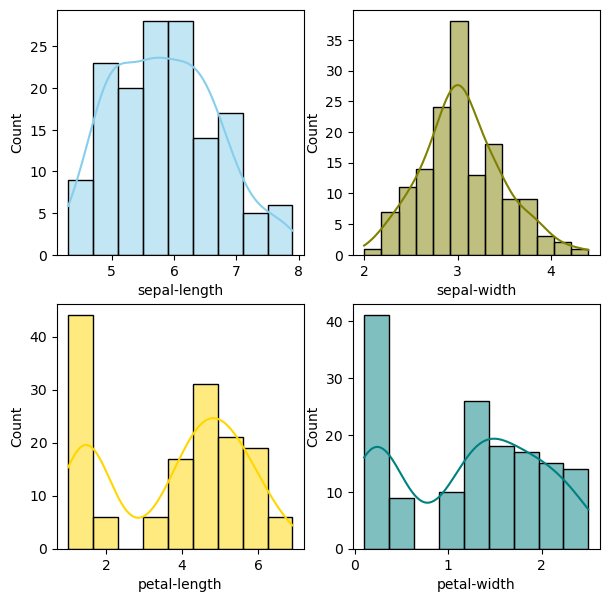

In [9]:
fig, axs = pyplot.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=dataset, x="sepal-length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dataset, x="sepal-width", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dataset, x="petal-length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dataset, x="petal-width", kde=True, color="teal", ax=axs[1, 1])
pyplot.show()

ความสัมพันธ์ระหว่าง คู่ของ feature

C:\Users\Alive\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


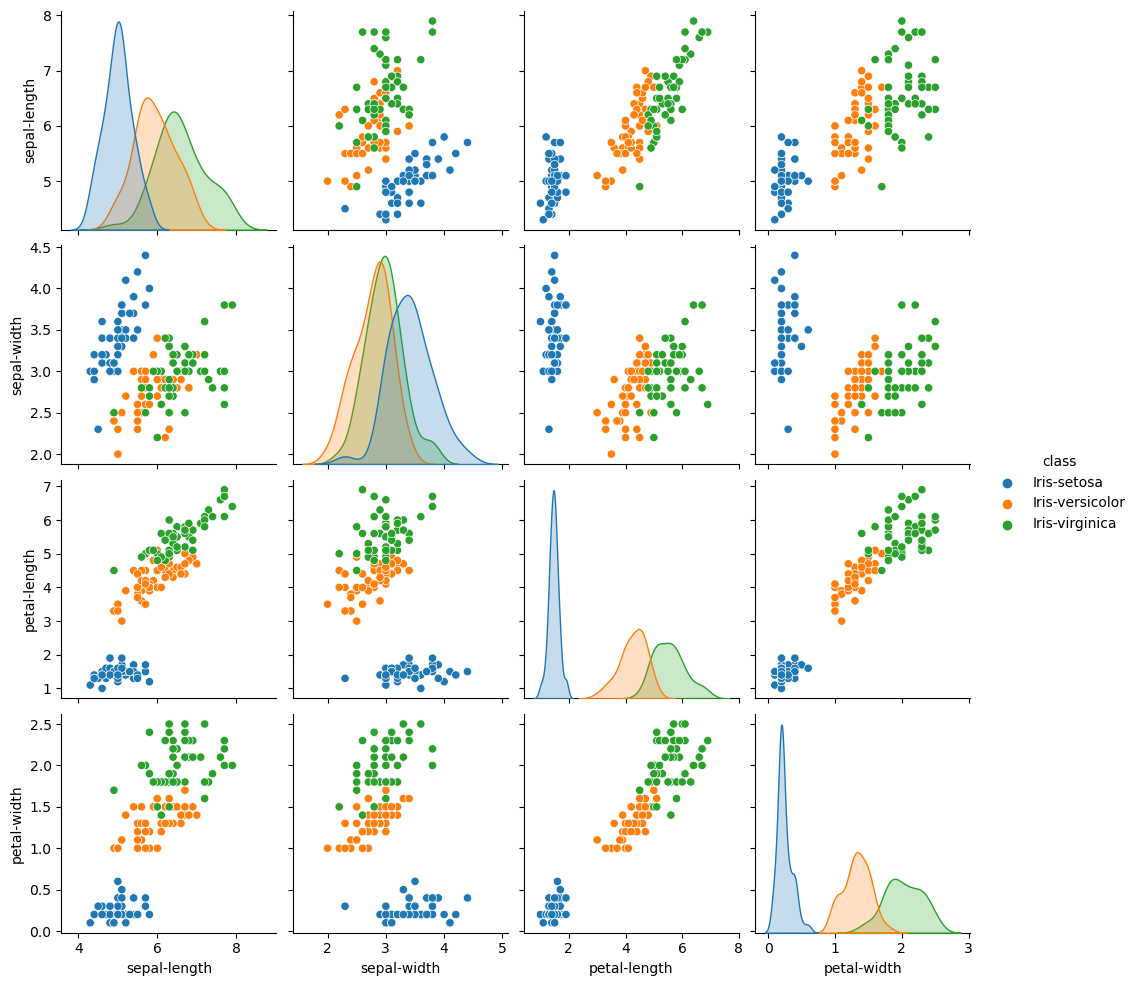

In [10]:
sns.pairplot(data=dataset,kind='scatter',hue='class')

แยกข้อมูลเป็นสองชุดคือ ชุด train และ test โดย ขนาดของ test เป็น 20% ของข้อมูลทั้งหมด

In [11]:
from sklearn.model_selection import train_test_split# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)




ทดสอบ learning machine 6 ตัว ได้แก่ Logistic Regression, Linear Discriminant Analysis, K Nearest Neighbor, Decision Tree, Gaussian Naive Bay และ Support Vector Machine

โดยการทดสอบ จะทำซ้ำ 10 ครั้ง และแสดงผลลัพธ์จากการเฉลี่ยของการทำซ้ำทั้งหมด


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

models.append(('RF', RandomForestClassifier()))
models.append(('NN', MLPClassifier(hidden_layer_sizes=1000)))

models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results เป็นสถิติของผลการรันที่สับเปลี่ยนกลุ่มตัวอย่าง 10 รอบ

In [13]:
# Spot Check Algorithms

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
RF: 0.950000 (0.040825)


C:\Users\Alive\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alive\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alive\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alive\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alive\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

NN: 0.966667 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


C:\Users\Alive\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


เปรียบเทียบ Learning Machine ด้วย box plot

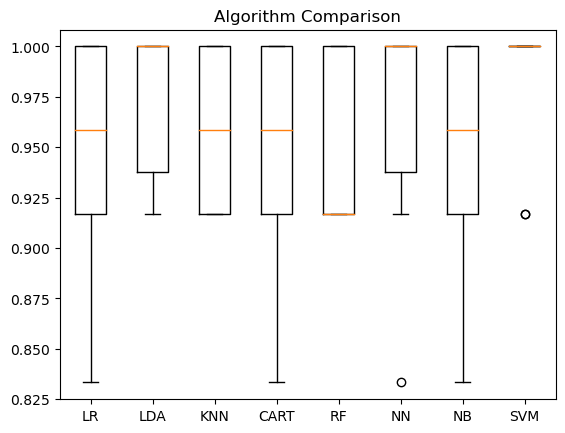

In [14]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# The End